## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [10]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batchsize in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH SIZE = %.6f" % (batchsize))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train,epochs=EPOCHS,batch_size=batchsize,validation_data=(x_test, y_test),shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Batch size-%s" % str(batchsize)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with BATCH SIZE = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 12

50000/50000 [==============================] - 672s 13ms/step - loss: 2.1815 - acc: 0.1947 - val_loss: 3.9404 - val_acc: 0.1984
Epoch 49/50
50000/50000 [==============================] - 665s 13ms/step - loss: 2.1771 - acc: 0.1948 - val_loss: 4.0813 - val_acc: 0.1776
Epoch 50/50
50000/50000 [==============================] - 668s 13ms/step - loss: 2.1813 - acc: 0.1952 - val_loss: 3.8940 - val_acc: 0.2046
Experiment with BATCH SIZE = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Ba

50000/50000 [==============================] - 97s 2ms/step - loss: 1.0099 - acc: 0.6385 - val_loss: 1.4289 - val_acc: 0.5202
Epoch 47/50
50000/50000 [==============================] - 98s 2ms/step - loss: 1.0013 - acc: 0.6389 - val_loss: 1.4333 - val_acc: 0.5190
Epoch 48/50
50000/50000 [==============================] - 99s 2ms/step - loss: 0.9919 - acc: 0.6426 - val_loss: 1.3685 - val_acc: 0.5429
Epoch 49/50
50000/50000 [==============================] - 94s 2ms/step - loss: 0.9819 - acc: 0.6487 - val_loss: 1.4256 - val_acc: 0.5280
Epoch 50/50
50000/50000 [==============================] - 94s 2ms/step - loss: 0.9778 - acc: 0.6484 - val_loss: 1.4154 - val_acc: 0.5283
Experiment with BATCH SIZE = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dens

Epoch 45/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7457 - acc: 0.7318 - val_loss: 1.6188 - val_acc: 0.5121
Epoch 46/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7350 - acc: 0.7359 - val_loss: 1.6473 - val_acc: 0.5038
Epoch 47/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7273 - acc: 0.7369 - val_loss: 1.6113 - val_acc: 0.5201
Epoch 48/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.7152 - acc: 0.7421 - val_loss: 1.6358 - val_acc: 0.5178
Epoch 49/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7080 - acc: 0.7438 - val_loss: 1.7105 - val_acc: 0.4967
Epoch 50/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.7052 - acc: 0.7439 - val_loss: 1.6647 - val_acc: 0.5141
Experiment with BATCH SIZE = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   


50000/50000 [==============================] - 27s 533us/step - loss: 0.3094 - acc: 0.8972 - val_loss: 2.3048 - val_acc: 0.4680
Epoch 44/50
50000/50000 [==============================] - 26s 512us/step - loss: 0.2888 - acc: 0.9061 - val_loss: 2.3958 - val_acc: 0.4688
Epoch 45/50
50000/50000 [==============================] - 26s 521us/step - loss: 0.2934 - acc: 0.9005 - val_loss: 2.3518 - val_acc: 0.4610
Epoch 46/50
50000/50000 [==============================] - 26s 516us/step - loss: 0.2790 - acc: 0.9072 - val_loss: 2.3977 - val_acc: 0.4577
Epoch 47/50
50000/50000 [==============================] - 26s 518us/step - loss: 0.2691 - acc: 0.9106 - val_loss: 2.3758 - val_acc: 0.4735
Epoch 48/50
50000/50000 [==============================] - 26s 520us/step - loss: 0.2508 - acc: 0.9178 - val_loss: 2.4828 - val_acc: 0.4648
Epoch 49/50
50000/50000 [==============================] - 26s 518us/step - loss: 0.2384 - acc: 0.9228 - val_loss: 2.4125 - val_acc: 0.4796
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 34s 688us/step - loss: 0.3109 - acc: 0.9104 - val_loss: 1.9730 - val_acc: 0.4866
Epoch 42/50
50000/50000 [==============================] - 34s 681us/step - loss: 0.2968 - acc: 0.9120 - val_loss: 2.0431 - val_acc: 0.4759
Epoch 43/50
50000/50000 [==============================] - 34s 688us/step - loss: 0.2829 - acc: 0.9181 - val_loss: 1.9767 - val_acc: 0.4957
Epoch 44/50
50000/50000 [==============================] - 34s 681us/step - loss: 0.2669 - acc: 0.9235 - val_loss: 2.0604 - val_acc: 0.4811
Epoch 45/50
50000/50000 [==============================] - 34s 686us/step - loss: 0.2560 - acc: 0.9262 - val_loss: 2.1209 - val_acc: 0.4822
Epoch 46/50
50000/50000 [==============================] - 35s 691us/step - loss: 0.2370 - acc: 0.9334 - val_loss: 2.0459 - val_acc: 0.4968
Epoch 47/50
50000/50000 [==============================] - 34s 683us/step - loss: 0.2196 - acc: 0.9411 - val_loss: 2.1612 - val_acc: 0.4830
Epoch 48/50
50000/50000 [=======

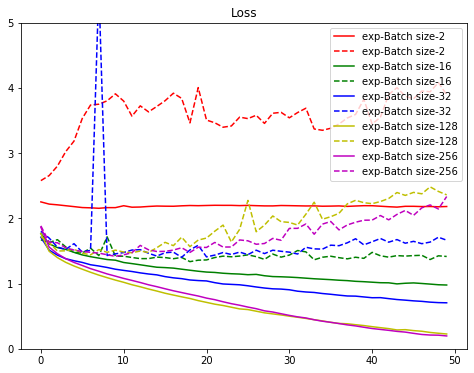

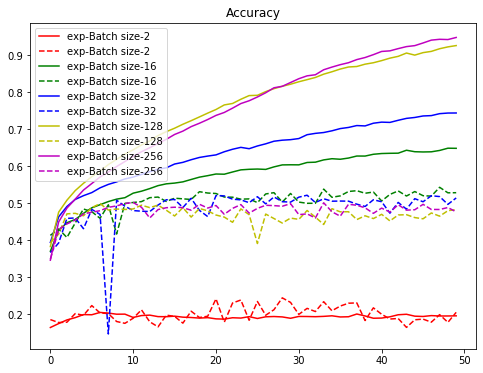

In [18]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()